In [30]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [31]:
def visualize_clusters(clusters, concat_data):
    # Get the number of unique clusters
    num_clusters = len(np.unique(clusters))

    # Plot clusters
    for cluster_num in range(1, num_clusters + 1):
        # Filter data points belonging to the current cluster
        selected_data = concat_data[clusters == cluster_num]

        # Create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot individual triangles with transparent grey lines
        for i in range(len(selected_data)):
            x = [selected_data[i, 0], 0, 0]
            y = [0, selected_data[i, 1], 0]
            z = [0, 0, selected_data[i, 2]]

            # Plot points
            ax.scatter(x, y, z, marker='o', c='grey')

            # Connect the points to form a triangle with transparent grey lines
            ax.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], [z[0], z[1], z[2], z[0]], c='grey', alpha=0.1)

        # Calculate the average triangle
        average_triangle = np.mean(selected_data, axis=0)
        x_avg = [average_triangle[0], 0, 0]
        y_avg = [0, average_triangle[1], 0]
        z_avg = [0, 0, average_triangle[2]]

        # Plot the average triangle with black lines
        ax.plot(x_avg + [x_avg[0]], y_avg + [y_avg[0]], z_avg + [z_avg[0]], c='black')

        # Plot red lines along the x, y, and z axes
        ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
        ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
        ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

        #ax.plot(x_avg, y_avg, z_avg, c='black')
        # Set axis labels
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        # Set axis limits to range from -1 to 1
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_zlim([-1, 1])
        ax.set_title(f"{cluster_num} Cluster")

        # Show the plot
        plt.show()    

In [32]:
def plot_histogram(clusters):
    # Plot histogram
    plt.hist(clusters, bins=range(min(clusters), max(clusters) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')

    # Set labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of the Cluster Count')

    # Show the plot
    plt.show()

In [33]:
# Create an empty list to store arrays from each file
data_list = []

# Specify the directory
directory = "0.5gcc_1000k_3br/"

# Loop over the range of integers from 50 to 74
for i in range(50, 75):
    # Generate the filename
    filename = f'{directory}00{i}.3b_clu-r.txt'
    
    try:
        # Read the data from the file and append it to the list
        data = np.loadtxt(filename)
        #print(data)
        #print(np.shape(data[0]))
        sort_data = np.sort(data, axis=1)
        #print(sort_data[0])
        data_list.append(sort_data) # Account for graph invariance
    except FileNotFoundError:
        print(f"File not found: {filename}")

# Concatenate the list of arrays along axis 0 (rows)
concat_data = np.concatenate(data_list, axis=0)


# Print the shape of concatenated data
print("Shape:", np.shape(concat_data))
concat_data

Shape: (19251, 3)


array([[4.44851, 4.85077, 4.90778],
       [2.97423, 3.23091, 4.90778],
       [4.44851, 4.62766, 4.66765],
       ...,
       [2.49198, 2.6107 , 4.15738],
       [4.15738, 4.19719, 4.77817],
       [2.56741, 2.6107 , 4.77817]])

# Raw Data

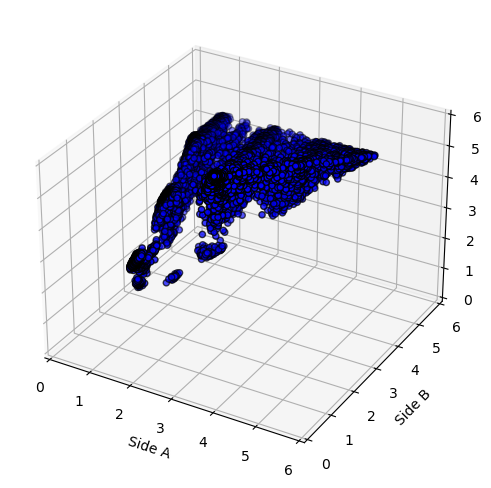

In [43]:
# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(concat_data[:, 0], concat_data[:, 1], concat_data[:, 2], c='blue', marker='o', edgecolors='black')

# Set labels for each axis
ax.set_xlabel('Side A')
ax.set_ylabel('Side B')
ax.set_zlabel('Side C')

# # Set axis limits to range from 0 to 6
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])

# # Plot red lines along the x, y, and z axes
# ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
# ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
# ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

# Set the title of the plot
#ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

KMeans Clustering

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [03:14<00:00,  6.96s/it]


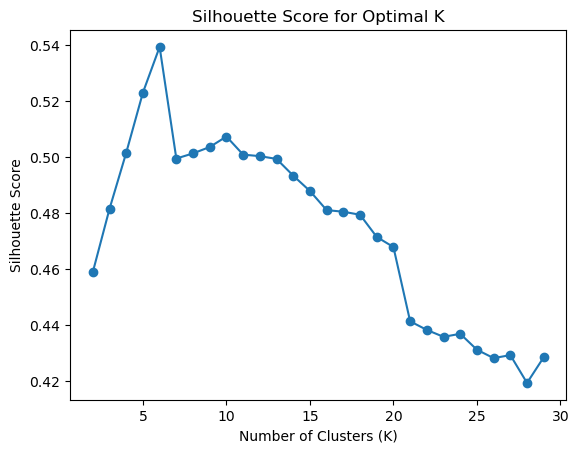

In [45]:
# Perform k-means clustering for a range of k values
silhouette_scores = []
k_values = range(2, 30)  # You can adjust the range of k values

for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(concat_data)
    silhouette_scores.append(silhouette_score(concat_data, clusters))

# Plot the Silhouette Score curve
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

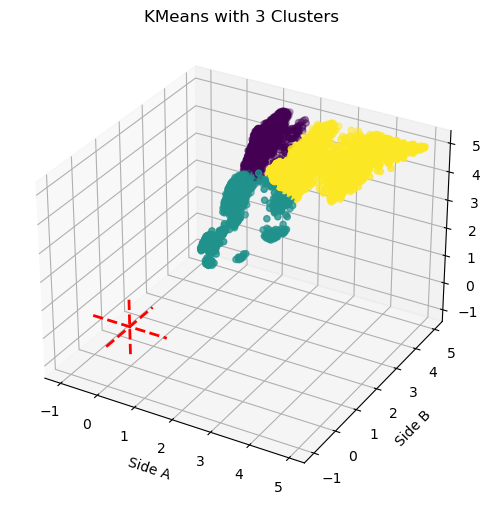

In [ ]:
# Perform k-means clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(concat_data)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(concat_data[:, 0], concat_data[:, 1], concat_data[:, 2], c=labels, marker='o')
ax.set_xlabel('Side A')
ax.set_ylabel('Side B')
ax.set_zlabel('Side C')
ax.set_title(f'KMeans with {optimal_k} Clusters')

# # Set axis limits to range from 0 to 6
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])

plt.show()


In [ ]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

1
(3581, 3)
[1.32453818 4.00756412 4.5959885 ]


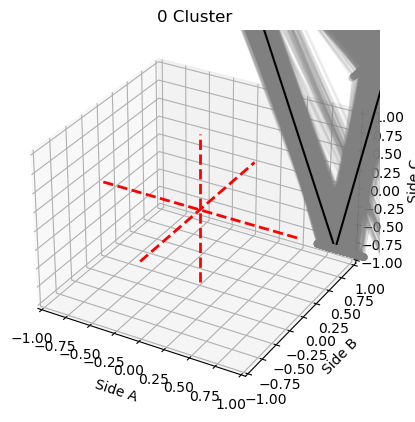

2
(3313, 3)
[1.37141855 2.21777828 3.28243682]


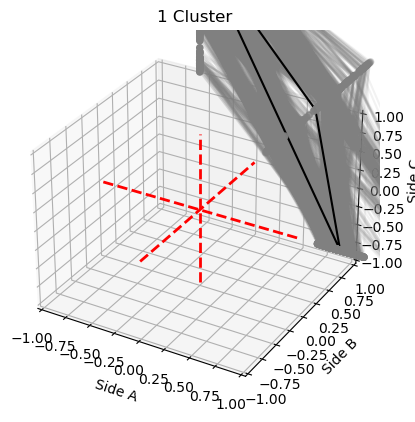

3
(3952, 3)
[2.98300234 3.87428861 4.59968522]


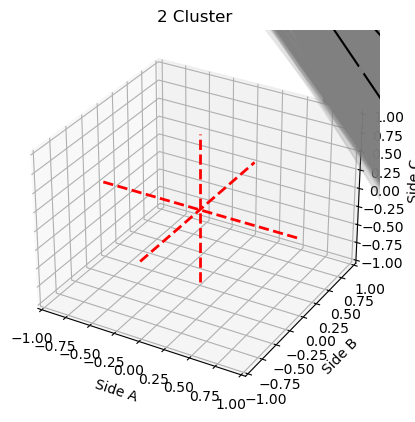

In [ ]:
# Get the number of unique clusters
num_clusters = len(np.unique(labels))
amounts = []

# Plot clusters
for cluster_num in range(1, num_clusters + 1):
    
    # Filter data points belonging to the current cluster
    selected_data = concat_data[labels == cluster_num-1]
    print(cluster_num)
    print(np.shape(selected_data))
    amounts.append(len(selected_data))
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot individual triangles with transparent grey lines
    for i in range(len(selected_data)):
        x = [selected_data[i, 0], 0, 0]
        y = [0, selected_data[i, 1], 0]
        z = [0, 0, selected_data[i, 2]]

        # Plot points
        ax.scatter(x, y, z, marker='o', c='grey')

        # Connect the points to form a triangle with transparent grey lines
        ax.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], [z[0], z[1], z[2], z[0]], c='grey', alpha=0.1)

    # Calculate the average triangle
    average_triangle = np.mean(selected_data, axis=0)
    print(average_triangle)
    x_avg = [average_triangle[0], 0, 0]
    y_avg = [0, average_triangle[1], 0]
    z_avg = [0, 0, average_triangle[2]]

    # Plot the average triangle with black lines
    ax.plot(x_avg + [x_avg[0]], y_avg + [y_avg[0]], z_avg + [z_avg[0]], c='black')

    # Plot red lines along the x, y, and z axes
    ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

    #ax.plot(x_avg, y_avg, z_avg, c='black')
    # Set axis labels
    ax.set_xlabel('Side A')
    ax.set_ylabel('Side B')
    ax.set_zlabel('Side C')
    
    # Set axis limits to range from -1 to 1
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_title(f"{cluster_num-1} Cluster")

    # Show the plot
    plt.show()    
    


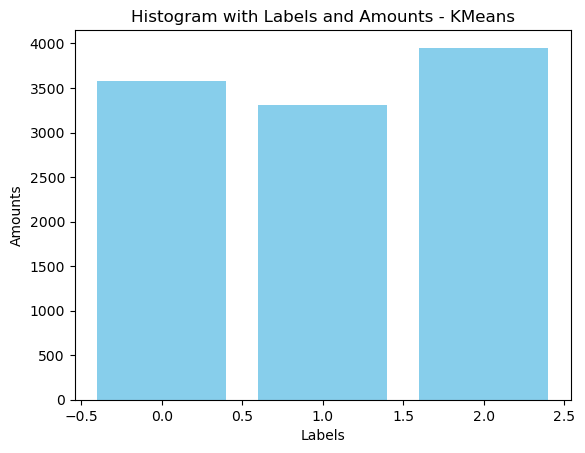

In [ ]:
# Create a bar plot
plt.bar(np.unique(labels), amounts, color='skyblue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Amounts')
plt.title('Histogram with Labels and Amounts - KMeans')

# Show the plot
plt.show()

Hierarchical Clustering

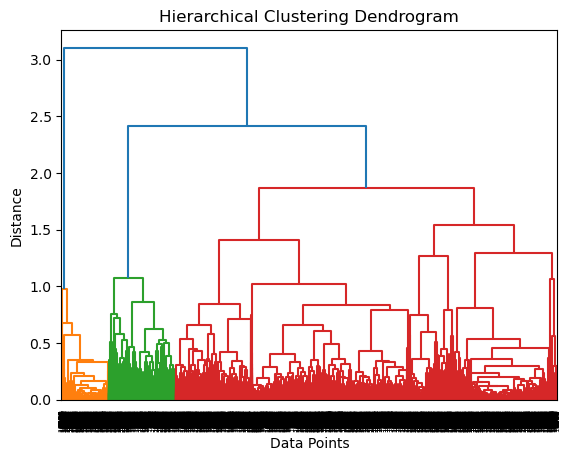

In [ ]:
# Calculate the linkage matrix using hierarchical clustering
linkage_matrix = linkage(concat_data, method='average')

# Plot the dendrogram
dendrogram(linkage_matrix, labels=np.arange(len(concat_data)), orientation='top')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

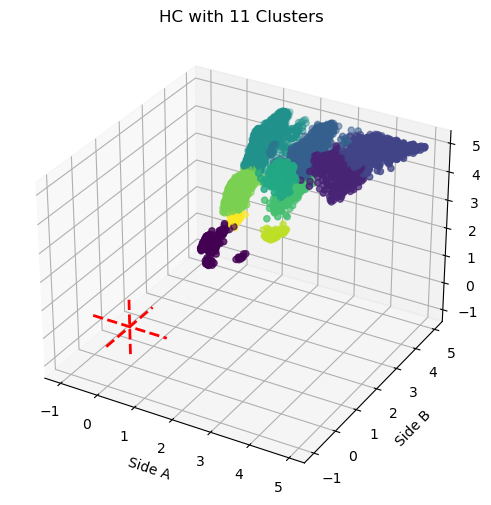

In [ ]:
# Choose a threshold to cut the dendrogram and form clusters
cutoff_height = 1.0 # Adjust this value based on your dendrogram

# Cut the dendrogram and get cluster assignments
labels = fcluster(linkage_matrix, t=cutoff_height, criterion='distance')

# Visualize the clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(concat_data[:, 0], concat_data[:, 1], concat_data[:, 2], c=labels, marker='o')
ax.set_xlabel('Side A')
ax.set_ylabel('Side B')
ax.set_zlabel('Side C')
ax.set_title(f'HC with {len(np.unique(labels))} Clusters')

# Plot red lines along the x, y, and z axes
ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

plt.show()

1
(1032, 3)
[1.29265546 1.41742911 2.51655561]


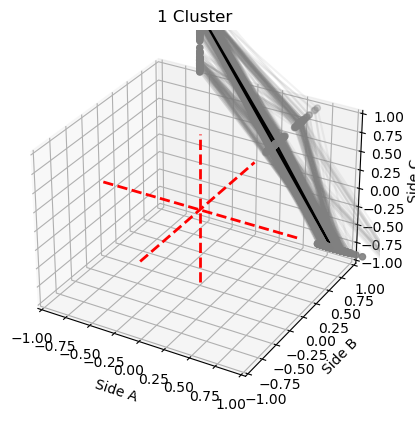

2
(418, 3)
[3.41725067 3.69410423 4.35801057]


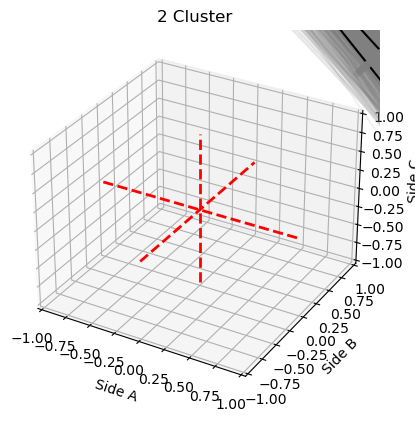

3
(1054, 3)
[3.88377719 4.40215222 4.7664686 ]


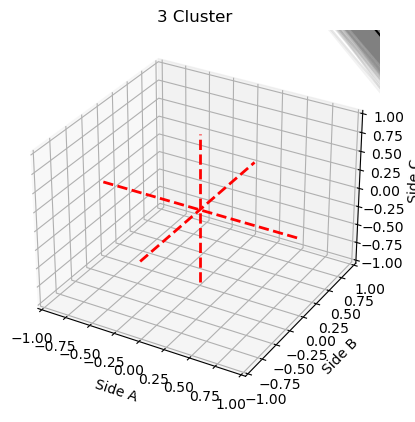

4
(1650, 3)
[2.54662385 4.09798875 4.6390875 ]


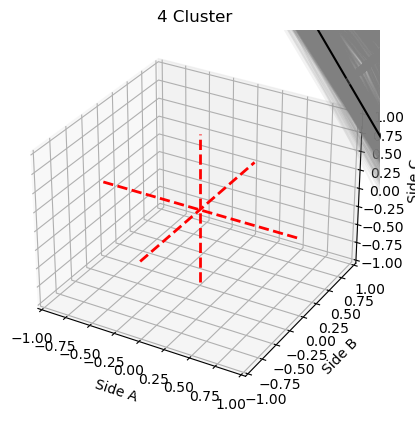

5
(15, 3)
[1.86051667 3.42401467 4.44137533]


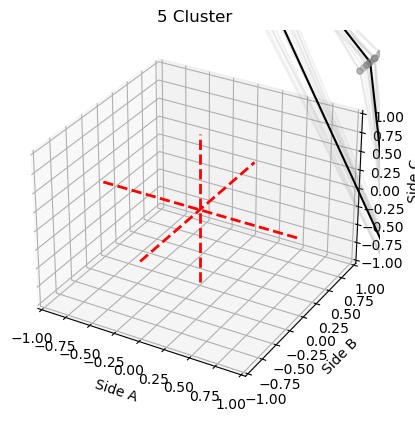

6
(3450, 3)
[1.32338475 4.03164594 4.62332742]


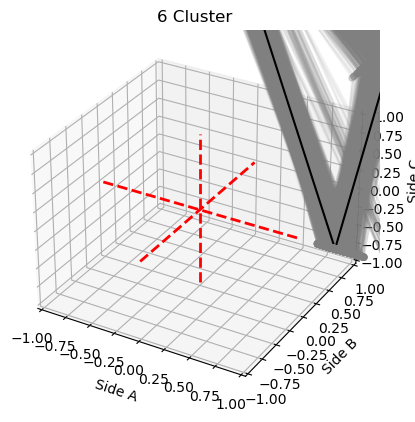

7
(626, 3)
[2.477495   2.60531589 4.68147495]


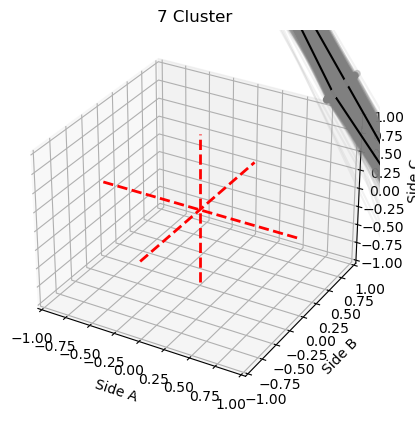

8
(326, 3)
[2.47466267 3.25289129 3.68119758]


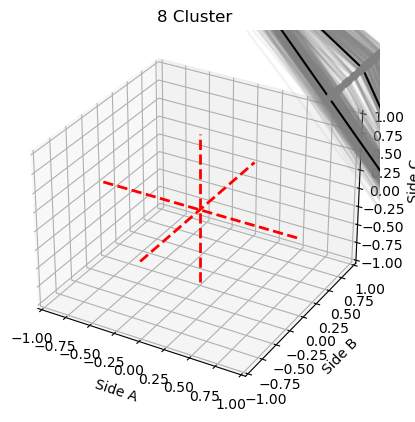

9
(2101, 3)
[1.31518744 2.62400484 3.71716694]


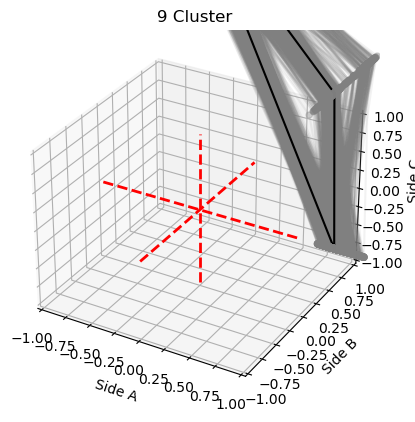

10
(66, 3)
[2.38545197 2.47944424 2.55141061]


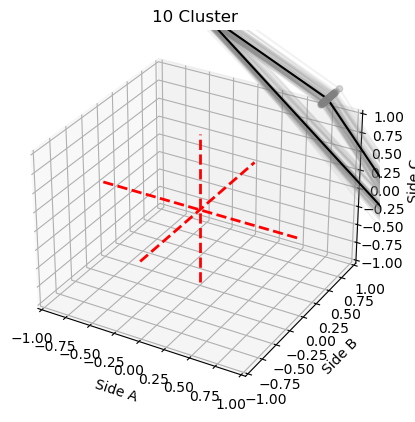

11
(108, 3)
[1.3496175  2.5251512  2.66558435]


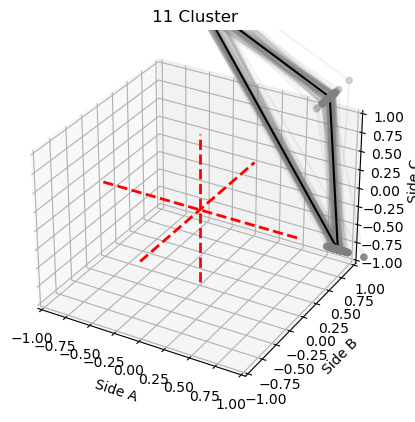

In [ ]:
# Get the number of unique clusters
num_clusters = len(np.unique(labels))
amounts = []

# Plot clusters
for cluster_num in range(1, num_clusters + 1):
    
    # Filter data points belonging to the current cluster
    selected_data = concat_data[labels == cluster_num]
    print(cluster_num)
    print(np.shape(selected_data))
    amounts.append(len(selected_data))
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot individual triangles with transparent grey lines
    for i in range(len(selected_data)):
        x = [selected_data[i, 0], 0, 0]
        y = [0, selected_data[i, 1], 0]
        z = [0, 0, selected_data[i, 2]]

        # Plot points
        ax.scatter(x, y, z, marker='o', c='grey')

        # Connect the points to form a triangle with transparent grey lines
        ax.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], [z[0], z[1], z[2], z[0]], c='grey', alpha=0.1)

    # Calculate the average triangle
    average_triangle = np.mean(selected_data, axis=0)
    print(average_triangle)
    x_avg = [average_triangle[0], 0, 0]
    y_avg = [0, average_triangle[1], 0]
    z_avg = [0, 0, average_triangle[2]]

    # Plot the average triangle with black lines
    ax.plot(x_avg + [x_avg[0]], y_avg + [y_avg[0]], z_avg + [z_avg[0]], c='black')

    # Plot red lines along the x, y, and z axes
    ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

    #ax.plot(x_avg, y_avg, z_avg, c='black')
    # Set axis labels
    ax.set_xlabel('Side A')
    ax.set_ylabel('Side B')
    ax.set_zlabel('Side C')
    
    # Set axis limits to range from -1 to 1
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_title(f"{cluster_num} Cluster")

    # Show the plot
    plt.show()    
    

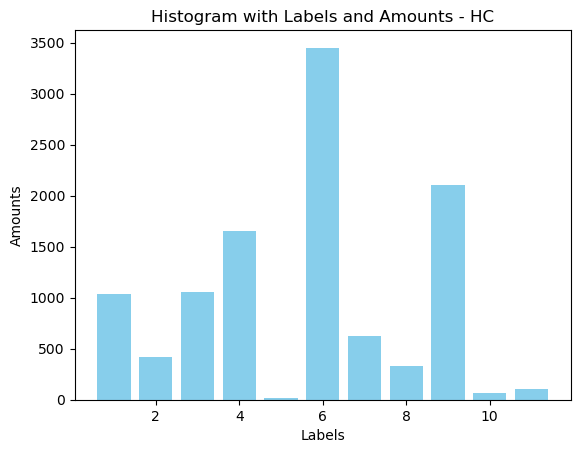

In [ ]:
# Create a bar plot
plt.bar(np.unique(labels), amounts, color='skyblue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Amounts')
plt.title('Histogram with Labels and Amounts - HC')

# Show the plot
plt.show()

DBSCAN Clustering

100%|██████████| 30/30 [00:27<00:00,  1.08it/s]


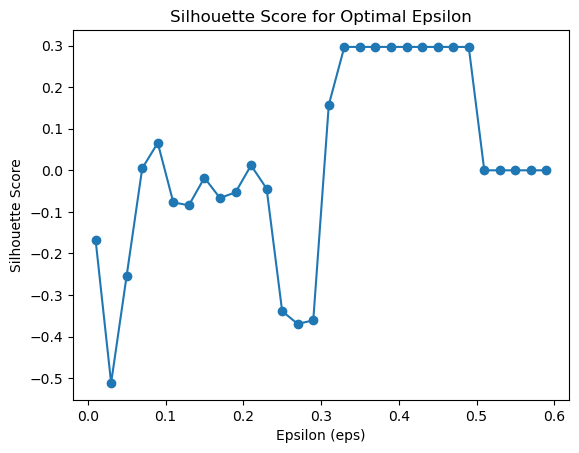

Optimal Epsilon (eps): 0.32999999999999996 with Silhouette Score: 0.2967840345648804


In [ ]:
# Set the range of eps values
eps_values = np.arange(0.01, 0.6, 0.02)

# Collect silhouette scores for each eps value
silhouette_scores = []

# Find the optimal eps value
optimal_eps = None
max_silhouette_score = -1

for eps in tqdm(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(concat_data)

    # Check for noise points
    if len(set(labels)) > 1:
        silhouette_score_value = silhouette_score(concat_data, labels)
        silhouette_scores.append(silhouette_score_value)

        # Update optimal_eps if the silhouette score is higher
        if silhouette_score_value > max_silhouette_score:
            max_silhouette_score = silhouette_score_value
            optimal_eps = eps
    else:
        silhouette_scores.append(0)

# Plot the results
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Epsilon')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.show()

# Print the optimal eps value
print(f"Optimal Epsilon (eps): {optimal_eps} with Silhouette Score: {max_silhouette_score}")

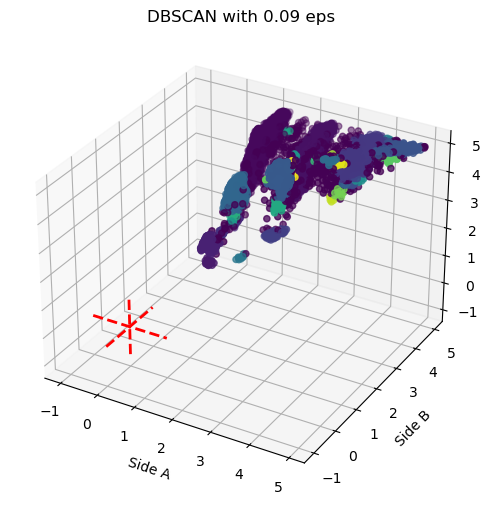

In [ ]:
# Standardize the data (important for DBSCAN)
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

# Apply DBSCAN
eps = 0.09  # Epsilon (maximum distance between two samples to be considered in the same neighborhood)
min_samples = 5  # Minimum number of samples in a neighborhood for a data point to be a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(concat_data)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(concat_data[:, 0], concat_data[:, 1], concat_data[:, 2], c=labels, marker='o')
ax.set_xlabel('Side A')
ax.set_ylabel('Side B')
ax.set_zlabel('Side C')
ax.set_title(f'DBSCAN with {eps} eps')

# Plot red lines along the x, y, and z axes
ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

plt.show()

  0%|          | 0/44 [00:00<?, ?it/s]

1
(671, 3)
[2.68423285 3.63750766 4.26006113]


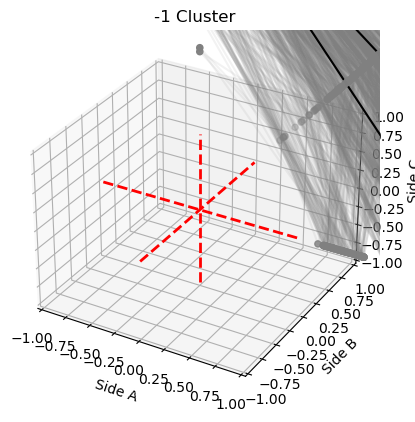

  2%|▏         | 1/44 [00:01<00:46,  1.09s/it]

2
(3540, 3)
[1.31076108 3.99433026 4.57866052]


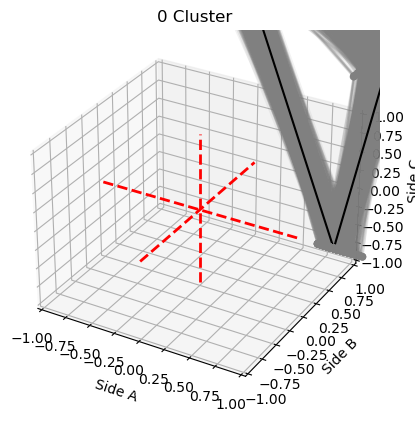

  5%|▍         | 2/44 [00:06<02:33,  3.65s/it]

3
(1724, 3)
[2.54054961 4.04827    4.53532778]


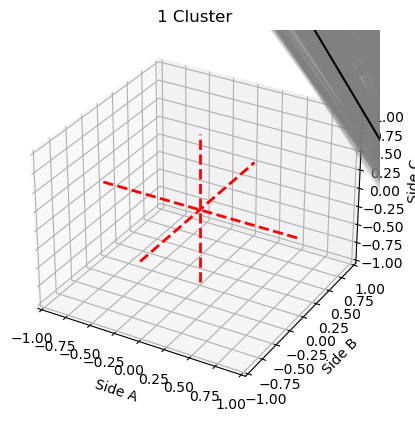

  7%|▋         | 3/44 [00:09<02:14,  3.27s/it]

4
(39, 3)
[1.32425077 1.35856256 1.90062795]


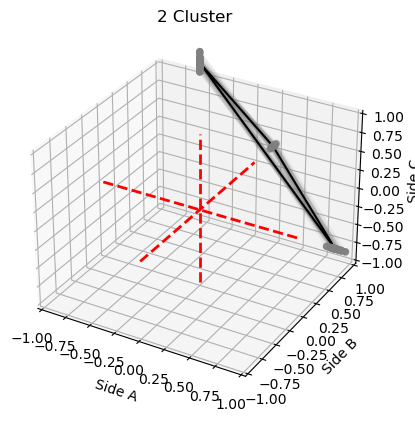

  9%|▉         | 4/44 [00:09<01:21,  2.03s/it]

5
(891, 3)
[1.27725589 1.36553288 2.54484437]


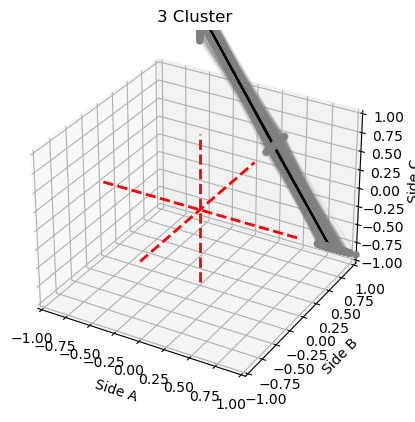

 11%|█▏        | 5/44 [00:10<01:11,  1.83s/it]

6
(80, 3)
[1.34117425 2.54743787 2.60463712]


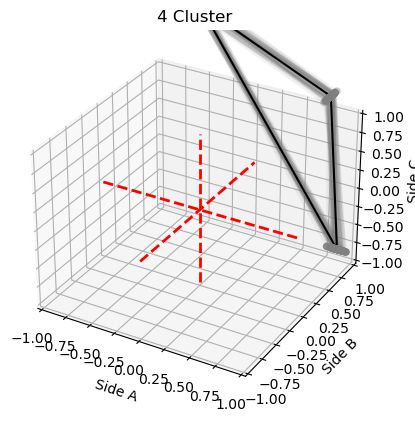

 14%|█▎        | 6/44 [00:11<00:49,  1.29s/it]

7
(75, 3)
[1.338298   1.9012892  2.57891027]


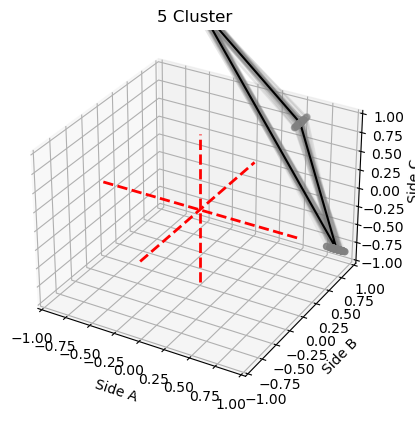

 16%|█▌        | 7/44 [00:11<00:34,  1.08it/s]

8
(852, 3)
[3.73794813 4.26453592 4.72025121]


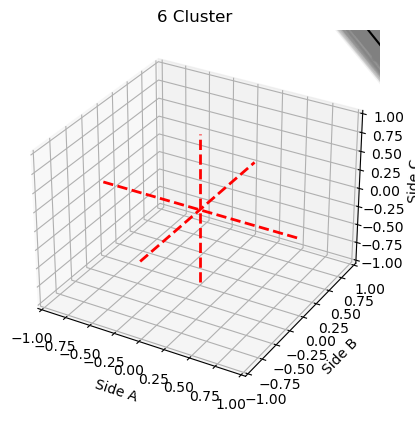

 18%|█▊        | 8/44 [00:12<00:37,  1.05s/it]

9
(60, 3)
[2.3939365  2.46800217 2.5407935 ]


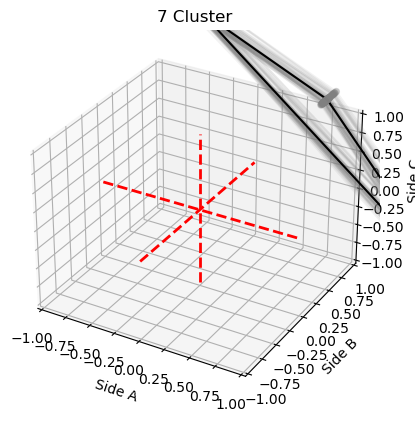

 20%|██        | 9/44 [00:12<00:27,  1.26it/s]

10
(10, 3)
[3.739423 3.848721 4.222513]


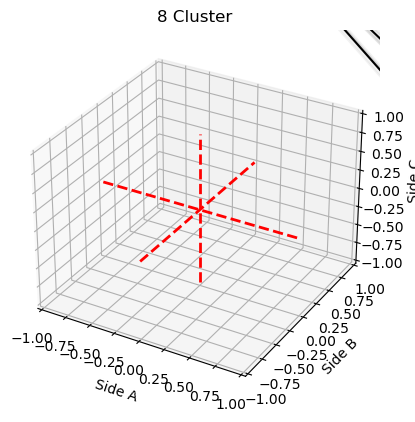

11
(9, 3)
[3.69961333 3.78404111 3.93598333]


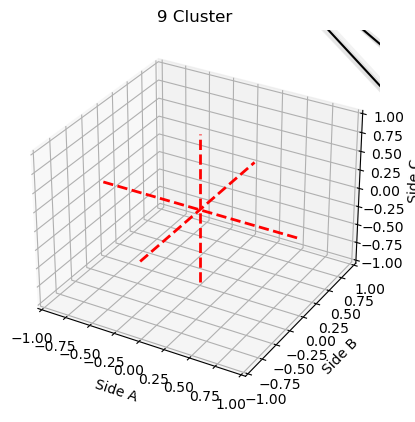

 25%|██▌       | 11/44 [00:13<00:14,  2.23it/s]

12
(144, 3)
[4.47220562 4.70644111 4.91843799]


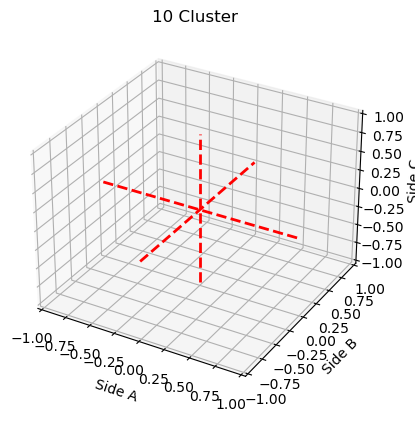

 27%|██▋       | 12/44 [00:13<00:13,  2.46it/s]

13
(587, 3)
[2.48053181 2.58638777 4.69072777]


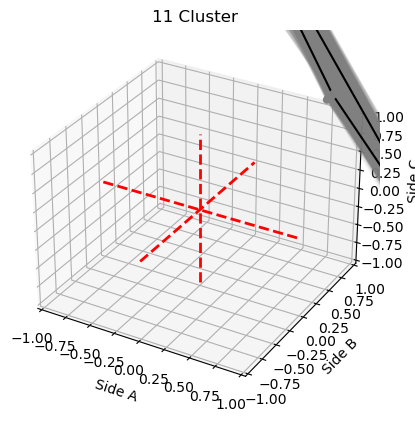

 30%|██▉       | 13/44 [00:14<00:17,  1.80it/s]

14
(15, 3)
[3.61234667 3.714622   4.05948467]


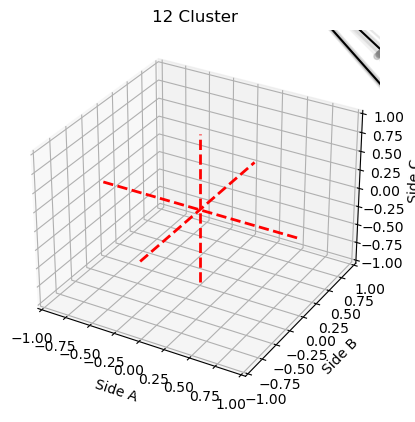

15
(1863, 3)
[1.31654078 2.54970013 3.72188828]


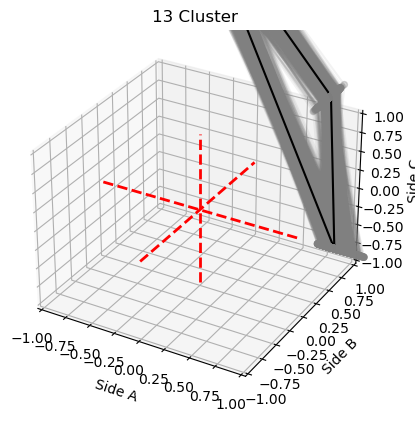

 34%|███▍      | 15/44 [00:17<00:27,  1.04it/s]

16
(18, 3)
[3.31705111 3.41206111 4.88767833]


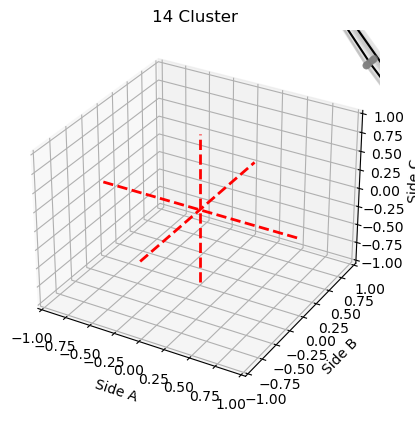

 36%|███▋      | 16/44 [00:17<00:21,  1.30it/s]

17
(12, 3)
[1.2630125  2.9140775  3.67385667]


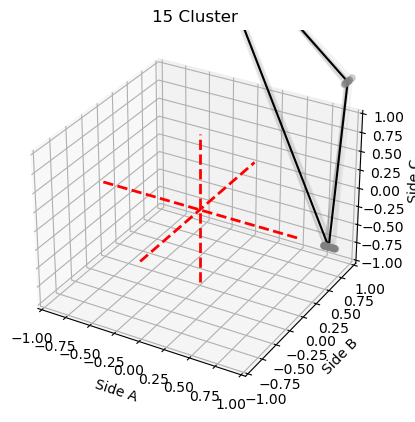

18
(12, 3)
[1.85967667 1.88952417 1.93110583]


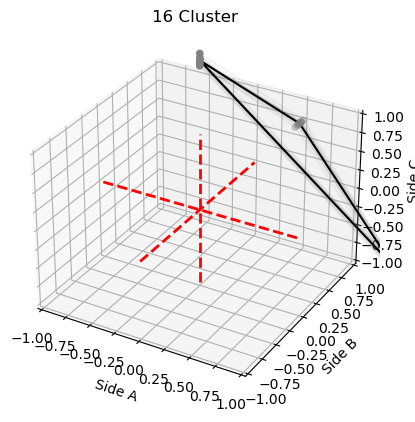

 41%|████      | 18/44 [00:17<00:12,  2.04it/s]

19
(8, 3)
[4.05825    4.91001625 4.95931875]


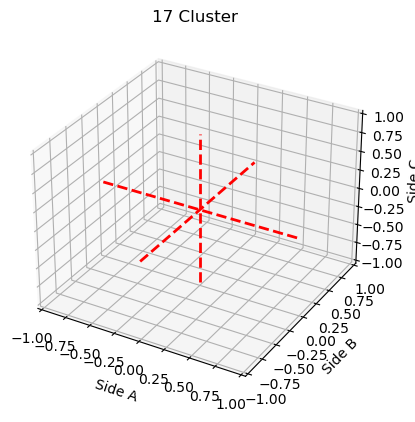

20
(6, 3)
[3.325625   3.66798    4.26255667]


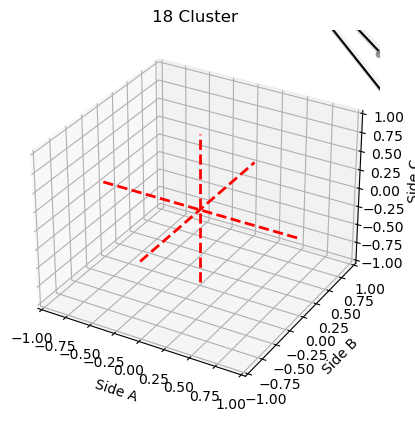

 45%|████▌     | 20/44 [00:17<00:08,  2.98it/s]

21
(18, 3)
[3.380325   3.76580722 4.70956722]


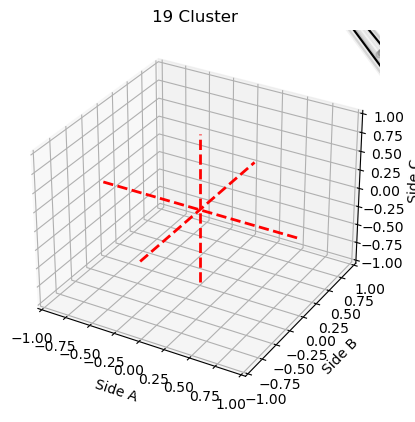

22
(15, 3)
[3.80792867 3.97549267 4.08596867]


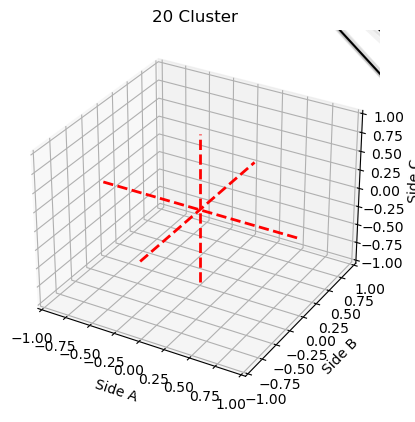

 50%|█████     | 22/44 [00:17<00:05,  4.04it/s]

23
(6, 3)
[2.54265333 3.18610667 4.93387333]


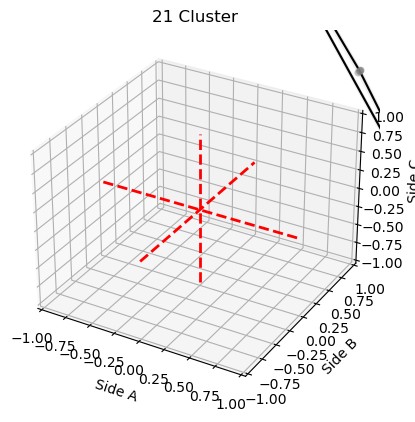

24
(7, 3)
[1.36231857 2.35254143 2.72484286]


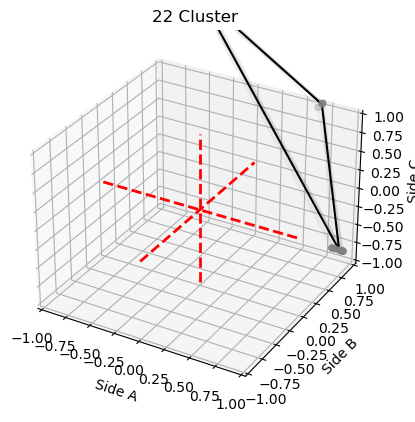

 55%|█████▍    | 24/44 [00:17<00:03,  5.38it/s]

25
(5, 3)
[3.510606 3.755236 3.846998]


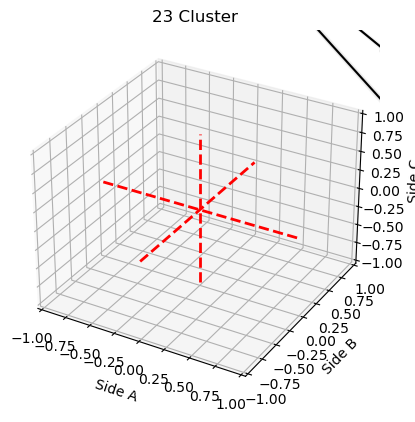

26
(5, 3)
[1.821278 4.139002 4.930938]


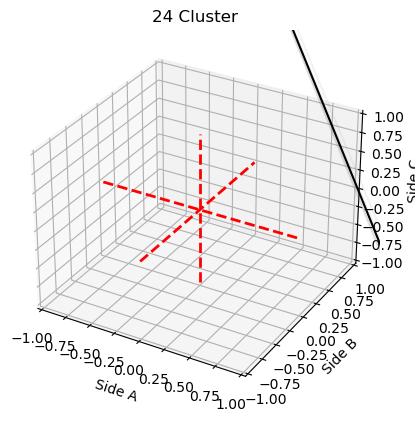

 59%|█████▉    | 26/44 [00:18<00:02,  6.78it/s]

27
(29, 3)
[2.43169483 2.57781483 3.52592517]


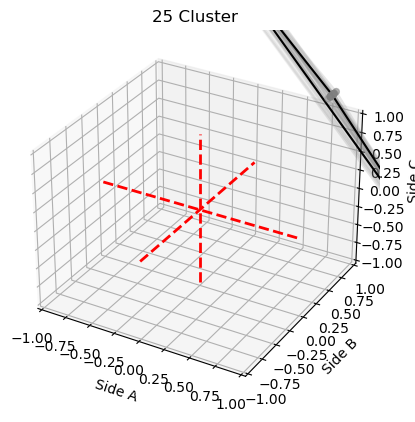

28
(14, 3)
[1.35839857 2.45851429 2.90111929]


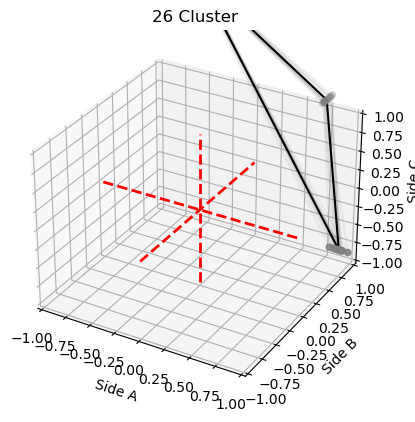

 64%|██████▎   | 28/44 [00:18<00:02,  7.77it/s]

29
(6, 3)
[2.38962    2.891825   3.58912833]


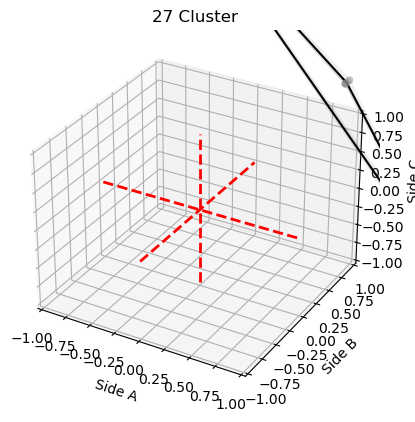

30
(6, 3)
[2.87517  3.583185 4.69533 ]


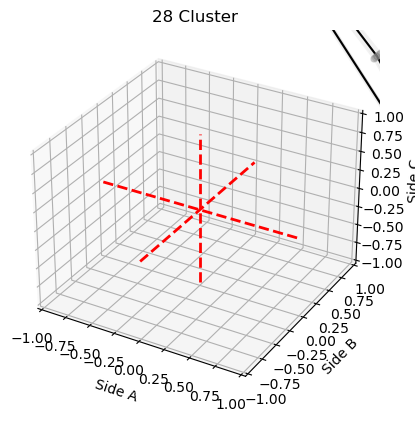

 68%|██████▊   | 30/44 [00:18<00:01,  9.11it/s]

31
(6, 3)
[2.56353667 2.86139333 4.71088   ]


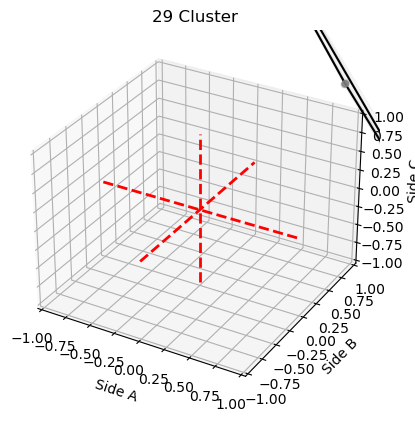

32
(7, 3)
[4.09528143 4.33878143 4.80036714]


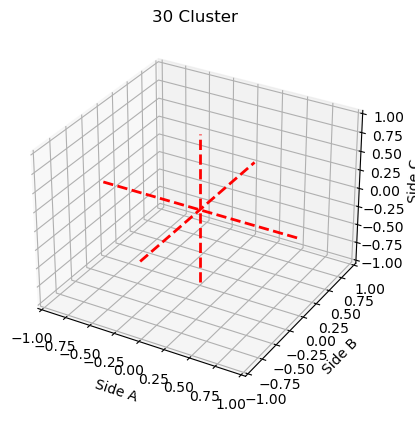

 73%|███████▎  | 32/44 [00:18<00:01, 10.27it/s]

33
(36, 3)
[4.355515   4.50093917 4.70218417]


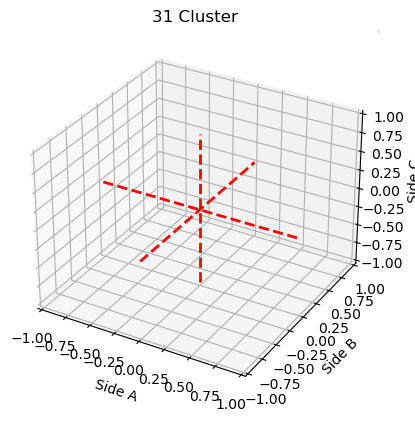

34
(3, 3)
[2.17929    2.52016333 4.3654    ]


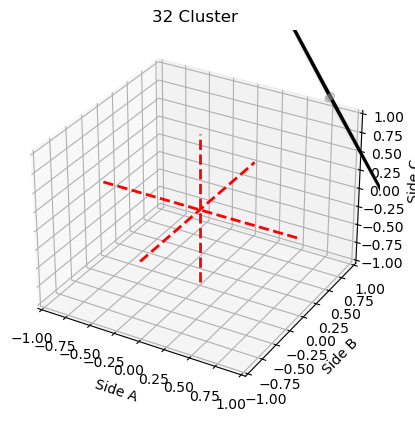

 77%|███████▋  | 34/44 [00:18<00:00, 10.79it/s]

35
(18, 3)
[3.49588889 3.57075222 3.72739778]


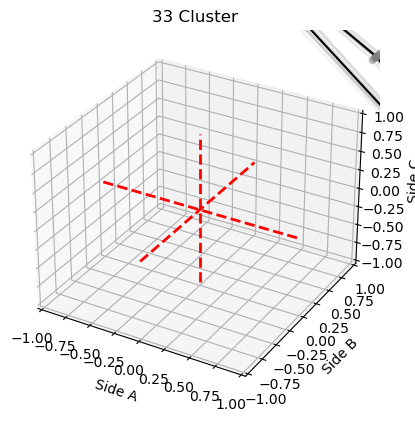

36
(4, 3)
[3.3842975 4.39773   4.5276025]


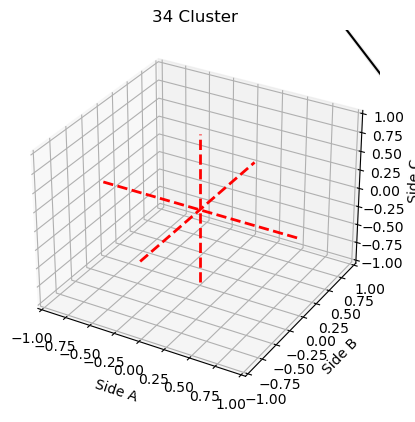

 82%|████████▏ | 36/44 [00:18<00:00, 11.26it/s]

37
(5, 3)
[1.231524 2.709198 3.368898]


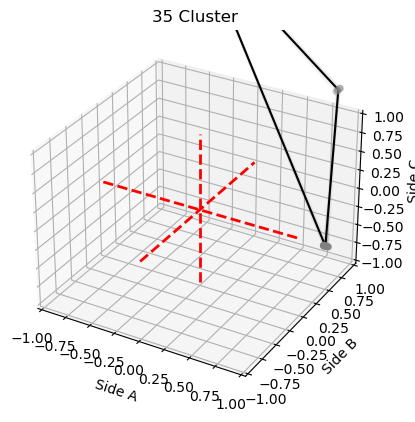

38
(5, 3)
[3.252684 3.638062 4.879278]


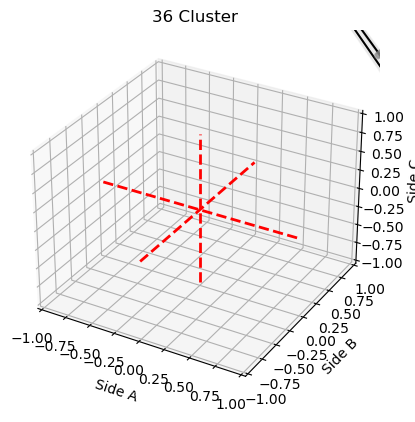

 86%|████████▋ | 38/44 [00:19<00:00,  9.29it/s]

39
(8, 3)
[3.24569625 3.55662875 4.61545   ]


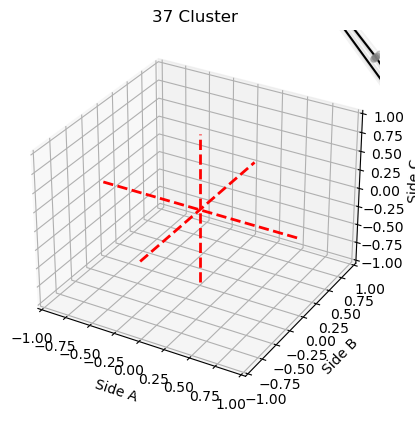

40
(5, 3)
[3.352532 3.463862 3.512522]


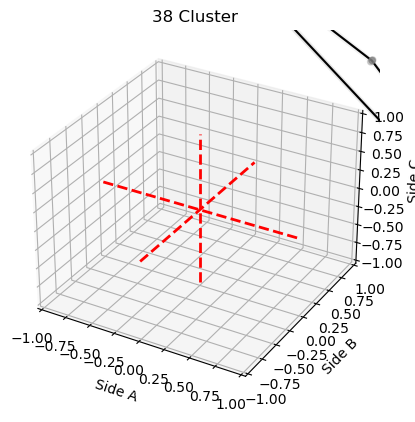

 91%|█████████ | 40/44 [00:19<00:00, 10.38it/s]

41
(5, 3)
[2.408174 3.06587  3.57731 ]


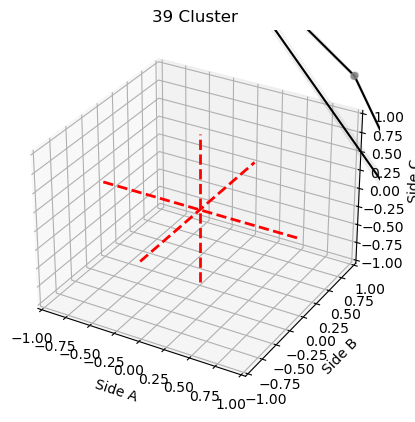

42
(7, 3)
[3.47705857 3.54629571 4.72215571]


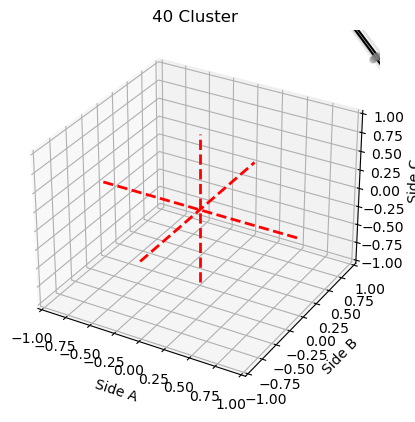

 95%|█████████▌| 42/44 [00:19<00:00, 11.39it/s]

43
(5, 3)
[2.55525  3.060854 4.342486]


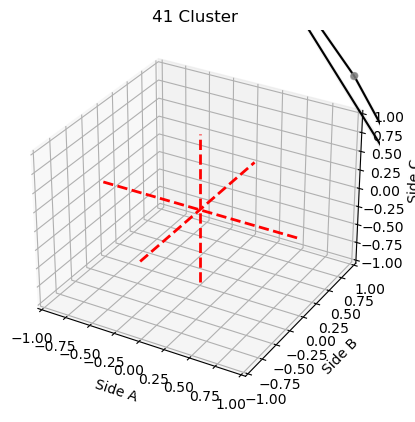

44
(5, 3)
[2.54269  3.045528 4.783738]


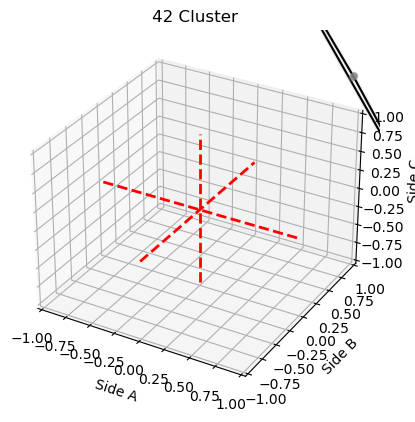

100%|██████████| 44/44 [00:19<00:00,  2.24it/s]


In [ ]:
# Get the number of unique clusters
num_clusters = len(np.unique(labels))
amounts = []

# Plot clusters
for cluster_num in tqdm(range(1, num_clusters + 1)):
    
    # Filter data points belonging to the current cluster
    selected_data = concat_data[labels == cluster_num-2]
    print(cluster_num)
    print(np.shape(selected_data))
    amounts.append(len(selected_data))
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot individual triangles with transparent grey lines
    for i in range(len(selected_data)):
        x = [selected_data[i, 0], 0, 0]
        y = [0, selected_data[i, 1], 0]
        z = [0, 0, selected_data[i, 2]]

        # Plot points
        ax.scatter(x, y, z, marker='o', c='grey')

        # Connect the points to form a triangle with transparent grey lines
        ax.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], [z[0], z[1], z[2], z[0]], c='grey', alpha=0.1)

    # Calculate the average triangle
    average_triangle = np.mean(selected_data, axis=0)
    print(average_triangle)
    x_avg = [average_triangle[0], 0, 0]
    y_avg = [0, average_triangle[1], 0]
    z_avg = [0, 0, average_triangle[2]]

    # Plot the average triangle with black lines
    ax.plot(x_avg + [x_avg[0]], y_avg + [y_avg[0]], z_avg + [z_avg[0]], c='black')

    # Plot red lines along the x, y, and z axes
    ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

    #ax.plot(x_avg, y_avg, z_avg, c='black')
    # Set axis labels
    ax.set_xlabel('Side A')
    ax.set_ylabel('Side B')
    ax.set_zlabel('Side C')
    
    # Set axis limits to range from -1 to 1
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_title(f"{cluster_num-2} Cluster")

    # Show the plot
    plt.show()    
    


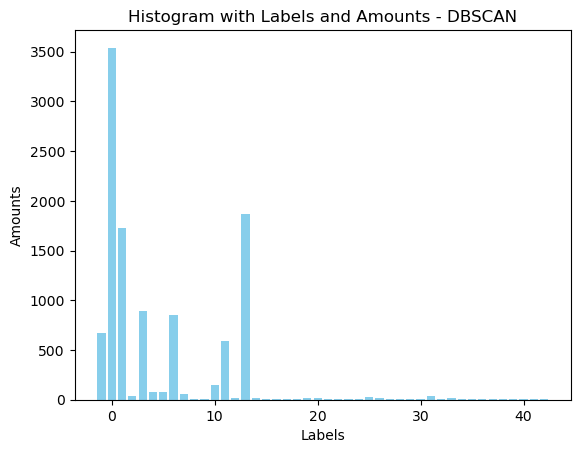

In [ ]:
# Create a bar plot
plt.bar(np.unique(labels), amounts, color='skyblue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Amounts')
plt.title('Histogram with Labels and Amounts - DBSCAN')

# Show the plot
plt.show()

# SVD Transformation

In [ ]:
import numpy as np

# Assuming your data matrix is called 'data' with size (n, 3)
# where n is the number of samples and 3 is the number of features.

# Perform SVD
U, Sigma, VT = np.linalg.svd(concat_data, full_matrices=False)

# U, Sigma, VT are the matrices in the SVD decomposition
# U: (n, n) matrix
# Sigma: (n,) array containing singular values
# VT: (n, 3) matrix

# If you want to reconstruct the original matrix A from the SVD components, you can use:
reconstructed_data = np.dot(U, np.dot(np.diag(Sigma), VT))


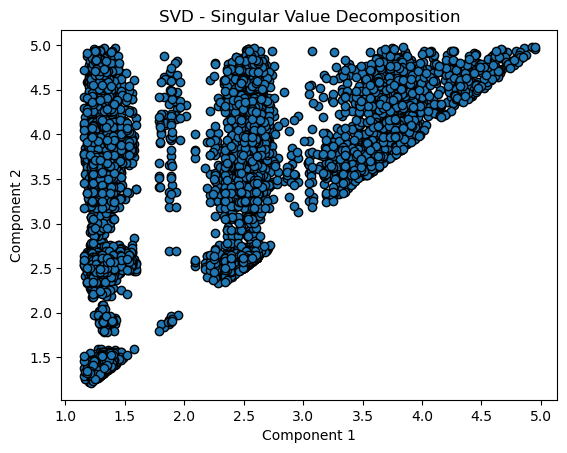

In [ ]:
# Visualize the PCA results
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], marker='o', edgecolors='black')
plt.title('SVD - Singular Value Decomposition')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()